#### **Bước 1. Phân tích các phương thức có trong chương trình**
**Bài toán:** Một nhạc sĩ đã để lại cho chúng tôi một tin nhắn . Nó có nghĩa là gì?

**Hint:** 
- .


**Phân tích**

Đây là một dạng mã hóa với mỗi ký tự là một tọa độ, ta có thể sử dụng một API tọa độ để lấy giá trị của từng ký tự này

**Tham khảo** https://github.com/Dvd848/CTFs/blob/master/2019_picoCTF/Mr-Worldwide.md 


In [24]:
import re
import requests 

flag_enc = ""

with open('message.txt', 'r') as file:
    lines = file.readlines()
for line in lines:
    flag_enc += line.strip()
    
# Regular expression để tách cặp tọa độ do flag dạng picoCTF{()()()}
coordinates = re.findall(r'\(([^)]+)\)', flag_enc) #['35.028309, 135.753082', '46.469391, 30.740883', ...]

def get_letter_from_coordinate(latitude, longitude):
    url = f"https://geocode.xyz/{latitude},{longitude}?json=1"
    response = requests.get(url)
    data = response.json()
    
    return data["geocode"][0]
   
flag = "picoCTF{"
for block in coordinates:
    lat, long = map(float, block.split(", "))
    address = get_letter_from_coordinate(lat, long)
    flag += address
print(flag + "}")
   
# lat, long = map(float, coordinates[3].split(", "))
# address = get_letter_from_coordinate(lat, long)
# print(address)


picoCTF{KODIATALANTT}


Kết quả này không đúng do có một số vẫn đề về kết quả trả về. Ta phải thực hiện trực tiếp.

**Kết quả:**
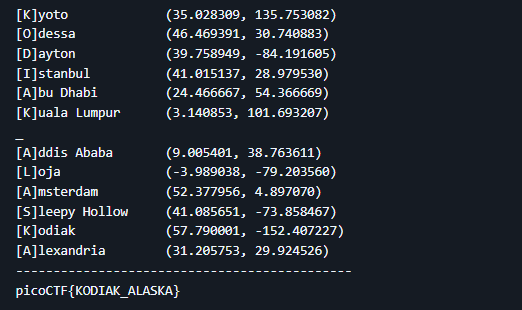